In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
df.sample(10)

id    qid1    qid2  \
74814    74814  128146  128147   
56511    56511   26054   32200   
400736  400736  534089  534090   
192461  192461  292100  292101   
403134  403134   17354  536698   
261952  261952  267839  378200   
236062  236062   23897   19781   
75366    75366  129001  129002   
354398  354398     121  483516   
397417  397417  530541  530542   

                                                question1  \
74814   What will the launch of the Apple iPhone look ...   
56511   Why are there so many people using Quora to an...   
400736                        Name some comedy tv series?   
192461                What does NAT do to my source port?   
403134  Where can I found best quality walk in wardrob...   
261952                How do I fix my garage door opener?   
236062  What are some major social faux pas to avoid w...   
75366   What is the equation for anaerobic respiration...   
354398  How do I download content from a kickass torre...   
397417  Can anyone give me some advice? I'm broke. I c...   

                                                question2  is_duplicate  
74814   What will the iPhone look like, 10 years from ...             0  
56511   Why do so many people ask google-able question...             1  
400736  Why am I still single at the age of 20 as a ma...             0  
192461  How can I connect my external hard disk to TP ...             0  
403134  Where can I the find best quality wardrobes in...             1  
261952                How do I fix my garage door spring?             0  
236062  What are some major social faux pas to avoid w...             0  
75366                         What is forced respiration?             0  
354398            Is Kickass Torrents shut down in India?             0  
397417  Is there any mechanical engineer from india wo...             0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot: >

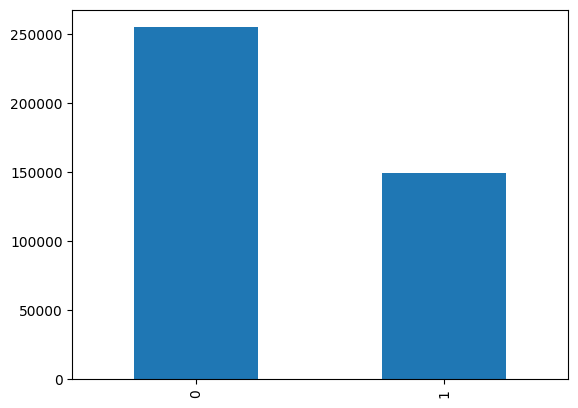

In [11]:
# Distribution of Duplicate and Non_duplicate Questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


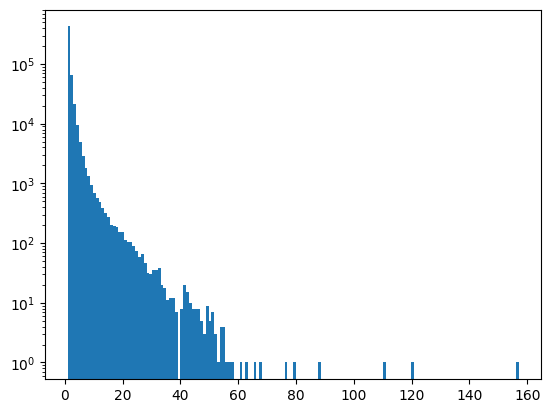

In [10]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()